In [3]:
import atoti  as tt
import matplotlib.pyplot as plt
import os
import sys
import datetime
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns

Welcome to atoti 0.6.6!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [25]:
from pandas.core.arrays.sparse import SparseArray as _SparseArray

In [26]:
sample_df = pd.read_csv('sample_cluster_metrics_2.csv')

In [97]:
#cluster_api_server_df["api_server_requests"]=cluster_api_server_df["api_server_requests"].astype(int)
#sample_df_melt["variable"]=sample_df_melt["variable"].astype(str)
sample_df["api_server_requests"]=sample_df["api_server_requests"].astype(int)

In [98]:
sample_df.head()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
index,,,,,,,,,,,,
0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10,79.931747,2022,5,24,20,30,30,20
1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10,79.947190,2022,5,24,20,31,30,20
2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10,79.853534,2022,5,24,20,32,30,24
3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10,79.402645,2022,5,24,20,33,30,24
4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10,78.959319,2022,5,24,20,34,30,21


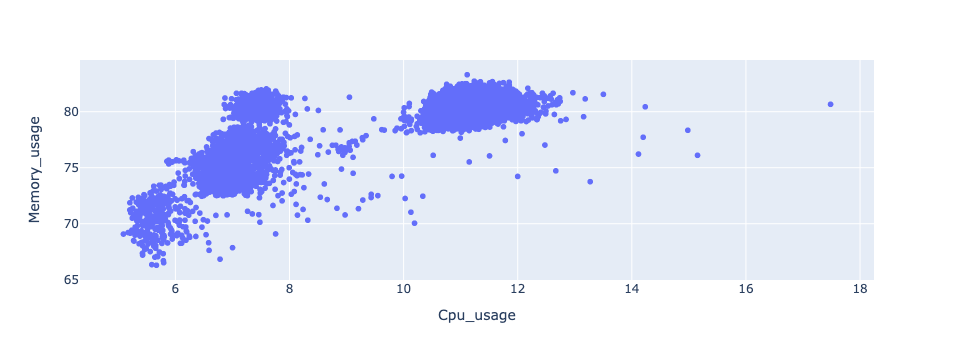

In [99]:
fig = px.scatter(sample_df, x="Cpu_usage", y="Memory_usage")
fig.show()

In [100]:
sample_df_concat = pd.concat([sample_df], axis = 0, ignore_index=True)
sample_df.index.set_names("index", inplace = True)
sample_df.head()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
index,,,,,,,,,,,,
0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10,79.931747,2022,5,24,20,30,30,20
1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10,79.947190,2022,5,24,20,31,30,20
2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10,79.853534,2022,5,24,20,32,30,24
3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10,79.402645,2022,5,24,20,33,30,24
4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10,78.959319,2022,5,24,20,34,30,21


In [101]:
sample_variables = sample_df_concat.reset_index()
sample_variables.head()

,index,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
0,0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10,79.931747,2022,5,24,20,30,30,20
1,1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10,79.947190,2022,5,24,20,31,30,20
2,2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10,79.853534,2022,5,24,20,32,30,24
3,3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10,79.402645,2022,5,24,20,33,30,24
4,4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10,78.959319,2022,5,24,20,34,30,21


In [102]:
sample_df_melt = pd.melt(
    sample_variables,
    id_vars = ["index"],
    value_vars=[
        "timestamp",
        "Cpu_usage",
        "Memory_usage(bytes)",
        "Memory_capacity(bytes)",
        "Memory_usage",
        "year",
        "month",
        "day",
        "hour",
        "minute",
        "second",
        "api_server_requests",
    ],
)

In [103]:
sample_df_melt.head()

,index,variable,value
0,0,timestamp,2022-05-24 20:30:30
1,1,timestamp,2022-05-24 20:31:30
2,2,timestamp,2022-05-24 20:32:30
3,3,timestamp,2022-05-24 20:33:30
4,4,timestamp,2022-05-24 20:34:30


In [104]:
session = tt.create_session(config={"user_content_storage": "./contentA"})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/atoti/_create_session.py:16: FutureWarning:

Creating sessions with `create_session()` is deprecated, use `Session()` directly instead.

Deleting existing "Unnamed" session to create the new one.


In [110]:
#sample_table = session.read_pandas(
#    sample_df_melt, table_name = "Cluster metrics", keys = ["index","variable"]
#)
sample_table = session.read_pandas(
     sample_df_melt, table_name = ("metrics")
 )


ArrowTypeError: Expected bytes, got a 'float' object

In [72]:
cube = session.create_cube(sample_table,"Clusters")

NameError: name 'sample_table' is not defined

In [73]:
cube.schema

NameError: name 'cube' is not defined